### Generate and visualize mixture distributions and their components

In [130]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [131]:
np.random.seed(42)
n_components = np.random.randint(5, 10) 
def sample_components(n_components):    
    means = np.random.uniform(-5, 5, (n_components, 2))
    covariances = []
    for _ in range(n_components):
        std_x = np.random.uniform(0.5, 1.5)
        std_y = np.random.uniform(0.5, 1.5)
        covariances.append(np.diag([std_x ** 2, std_y ** 2]))

    covariances = np.array(covariances)    

    weights = np.random.rand(n_components)
    weights /= weights.sum()

    return weights, means, covariances

In [132]:
def sample_mixture(n_samples, weights, means, covariances):
    n_components = len(weights)
    samples = []
    labels = []

    # assign each sample to component (cluster)
    components = np.random.choice(n_components, size=n_samples, p=weights)

    for k in range(n_components):
        count = np.sum(components == k)
        if count > 0:
            samples_k = np.random.multivariate_normal(means[k], covariances[k], count)
            samples.append(samples_k)
            labels.append(np.full(count, k))

    X = np.vstack(samples)
    z = np.concatenate(labels) #latent variables
    return X, z


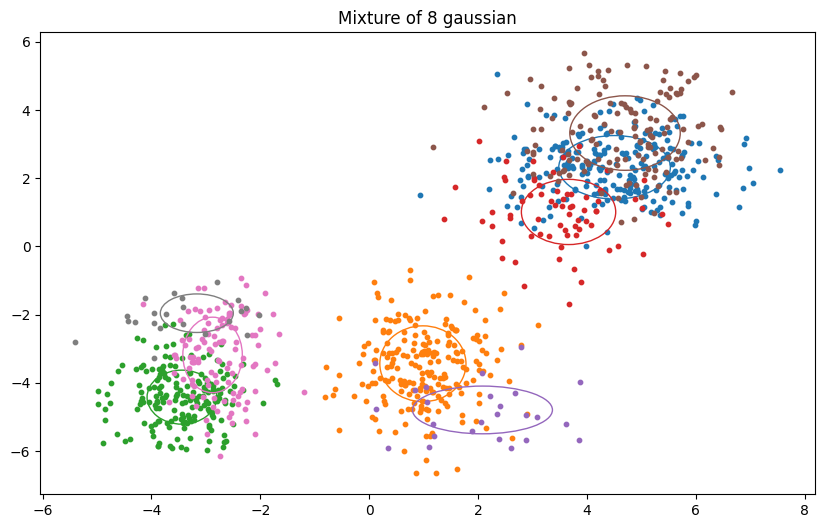

In [133]:
weights, means, covariances = sample_components(n_components)
X, z = sample_mixture(1000, weights, means, covariances)
plt.figure(figsize=(10, 6))

colors = plt.cm.tab10(np.arange(n_components))
axes = plt.gca()
plt.title(f'Mixture of {n_components} gaussian')
for k in range(n_components):
    color = colors[k]
    mean = means[k]
    cov = covariances[k]

    axes.scatter(X[z == k, 0], X[z == k, 1], s=10, color=colors[k])

    # draw covariation ellips
    eigvals, eigvectors = np.linalg.eigh(cov)
    eigvals, eigvectors = eigvals[::-1], eigvectors[::-1]        

    angle = np.degrees(np.arctan2(eigvectors[1, 0], eigvectors[0, 0]))
    width, height = 2 * (np.sqrt(eigvals))
    ellip = Ellipse(
        xy=mean,
        width=width,
        height=height,
        angle=angle,
        edgecolor=colors[k],
        fc='none'      
    )
    axes.add_patch(ellip)    

### Use GMM for our mixture

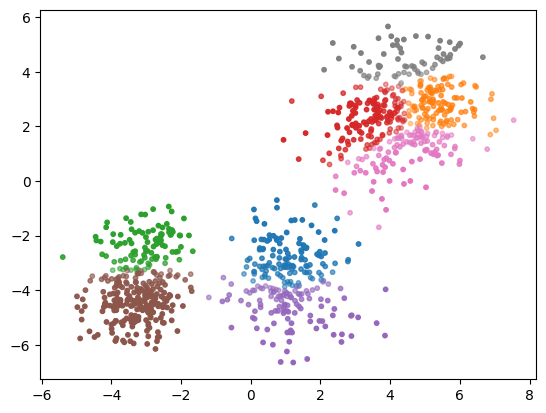

In [134]:
from sklearn.mixture import GaussianMixture

gmm  = GaussianMixture(n_components, covariance_type='full', random_state=42)
gmm.fit(X)
probas = gmm.predict_proba(X)
labels_gmm = np.argmax(probas, axis=1)
labels_gmm_probas = np.max(probas, axis=1)

for k in range(n_components):
    main_color = colors[k] #for opacity of points we make pallete here
    mask = labels_gmm == k
    matches_count = mask.sum()    
    points_colors = np.full((matches_count, main_color.shape[0]), main_color)
    opacities = labels_gmm_probas[mask]
    points_colors[:, 3] = opacities
        
    plt.scatter(X[mask, 0], X[mask, 1], s=10, color=points_colors)
